# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [4]:
# Standardize all training images
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


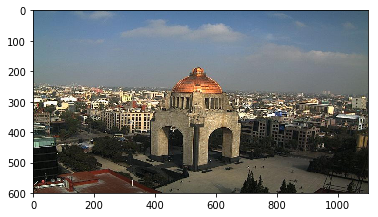

In [5]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))


# Feature Extraction

Create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.


---
###  Find the average brightness using the V channel

This function takes in a **standardized** RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.

In [6]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600*1100.0  # pixels
    
    # find the avg
    avg = sum_brightness/area
    
    return avg

Avg brightness: 95.9013166667


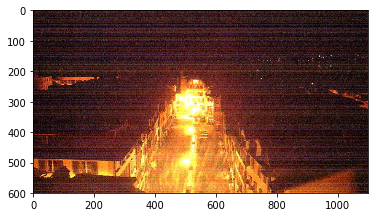

In [7]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

In [17]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# Find the average of the averages from all day and night images

night_brightness = []
day_brightness = []

for image in STANDARDIZED_LIST:
    
    if image[1] == 0:
        night_brightness.append(avg_brightness(image[0]))
    elif image[1] == 1:
        day_brightness.append(avg_brightness(image[0]))

avg_day_brightness = np.mean(day_brightness)
avg_night_brightness = np.mean(night_brightness)
min_day_brightness = np.min(day_brightness)
max_night_brightness = np.max(night_brightness)

print(f"Average of average day brightness from: {avg_day_brightness}")
print(f"Average of average night brightness: {avg_night_brightness}")
print(f"Minimum day brightness: {min_day_brightness}")
print(f"Maximum night brightness: {max_night_brightness}")

Average of average day brightness from: 137.37790688131312
Average of average night brightness: 69.20089227272727
Minimum day brightness: 94.57182878787879
Maximum night brightness: 119.6223


# Classification and Visualizing Error

In this section, we'll turn our average brightness feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively).

---
### TODO: Build a complete classifier 

Complete this code so that it returns an estimated class label given an input RGB image.

In [18]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    # TO-DO: Extract average brightness feature from an RGB image 
    avg =  avg_brightness(rgb_image)
        
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0
    # TO-DO: Try out different threshold values to see what works best!
    threshold = avg_night_brightness + (avg_day_brightness - avg_night_brightness)/2
    if(avg > threshold):
        # if the average brightness is above the threshold value, we classify it as "day"
        predicted_label = 1
    # else, the predicted_label can stay 0 (it is predicted to be "night")
    
    return predicted_label    
    

## Testing the classifier

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook!

Since we are using a pretty simple brightess feature, we may not expect this classifier to be 100% accurate. We'll aim for around 75-85% accuracy usin this one feature.


### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [19]:
import random

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Determine the Accuracy

Compare the output of your classification algorithm (a.k.a. your "model") with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `misclassified`.

In [20]:
# Constructs a list of misclassified images given a list of test images and their labels
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


In [21]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.925
Number of misclassified images = 12 out of 160


---
<a id='task9'></a>
### TO-DO: Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify. This will help you identify any weaknesses in your classification algorithm.

1


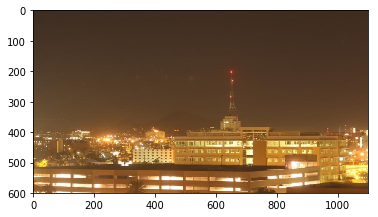

In [23]:
# Visualize misclassified example(s)
# Display an image in the `MISCLASSIFIED` list 
# Print out its predicted label - to see what the image *was* incorrectly classified as
num = 4
test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print(f"{MISCLASSIFIED[num][1]}")

---
<a id='question2'></a>
## (Question): After visualizing these misclassifications, what weaknesses do you think your classification algorithm has?

**Answer:** Brightness is the issue in this technique, In Night bightness is high due to electronic lights, so it's detecting day!

# 5. Improve your algorithm!

* (Optional) Tweak your threshold so that accuracy is better.
* (Optional) Add another feature that tackles a weakness you identified!
---


In [24]:
def colors_green_blue(rgb_image):
    # Finds amount of green and blue there is in picture
    # At night there are little green and blue colors
    
    
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    # Color selection, green and blue
    lower_hue = np.array([90,0,0]) 
    upper_hue = np.array([135,255,255])
    # Define the masked area in HSV space
    mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

    plt.imshow(mask_hsv)
    # Add up all the pixel values in the V channel
    sum_color = np.sum(mask_hsv)

    area = 600*1100.0  # pixels
    
    # Colors that are green and blue, 0 non, 255 all
    amount = ((sum_color/area)/255)*100
    
    # Return value between 0 and 100
    return amount

In [25]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    # Extract average brightness feature from an RGB image 
    avg = avg_brightness(rgb_image)
    
    # Extract amount color of green and blue in image
    amount = colors_green_blue(rgb_image)
        
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0
    
    # Set the value of a threshold that will separate day and night images
    threshold = avg_night_brightness + (avg_day_brightness - avg_night_brightness)/2
    
    # Set the amount of green and blue wee expect in daytime
    threshold_2 = 6
    

    if(avg > threshold-5 and amount > threshold_2):
        # if the average brightness is above the threshold value, we classify it as "day"
        predicted_label = 1
    # else, the pred-cted_label can stay 0 (it is predicted to be "night")
    
    return predicted_label    
    

In [26]:
# Constructs a list of misclassified images given a list of test images and their labels
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


Accuracy: 0.9875
Number of misclassified images = 2 out of 160


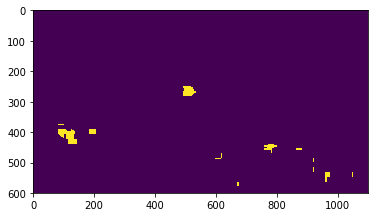

In [27]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

0


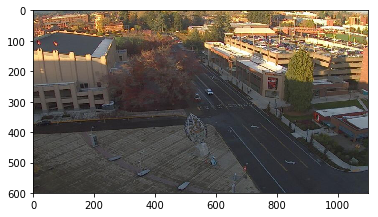

In [34]:
# Visualize misclassified example(s)
# Display an image in the `MISCLASSIFIED` list 
# Print out its predicted label - to see what the image *was* incorrectly classified as
num = 0
test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print(f"{MISCLASSIFIED[num][1]}")

0


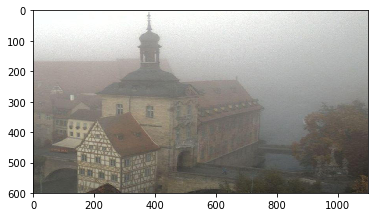

In [36]:
# Visualize misclassified example(s)
# Display an image in the `MISCLASSIFIED` list 
# Print out its predicted label - to see what the image *was* incorrectly classified as
num = 1
test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print(f"{MISCLASSIFIED[num][1]}")

Low Brightness due to fog/high shadow detecting Night!